# **Implementasi Algolritma Apriori**
Algolritma Apriori adalah algoritma yang bisa dipergunakan untuk analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda yang dibeli pada suatu transaksi tertentu. Tujuan dari algoritma untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan

## **Algoritma Apriori**

Algoritma Apriori adalah suatu algoritma dasar yang diusulkan oleh Agrawal & Srikant pada tahun 1994 untuk penentuan frequent itemsets untuk aturan asosiasi boolean. Algoritma Apriori memberi kita sifat asosiatif dalam transaksi. Ini juga dikenal sebagai Aturan Asosiasi. Aturan asosiasi atau association rule adalah teknik untuk menemukan aturan asosiasi antara suatu kombinasi item. Terdapat 3 metrik untuk mengukur ketepatan aturan, yaitu :


### **1. Support**
Support adalah indikasi seberapa sering kumpulan item muncul pada dataset. Berikut perhitungan nilai support :

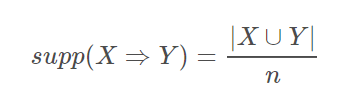

### **2. Confidence**
Confidence adalah suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (berdasarkan suatu kondisi tertentu). Berikut perhitungan nilai confidence :

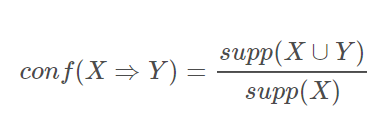

### **3. Lift**
Lift mengacu pada bagaimana peluang kedua item dibeli ketika item pertama dibeli. Berikut perhitungan nilai confidence :
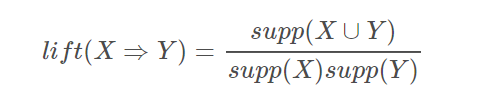



---



# **Langkah Analisa**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**
Kita akan menggunakan data penjualan pada dataset.csv 
Sekarang import data ke DataFrame dengan library pandas.

In [24]:
#Download Dataset


In [25]:
# Menampilkan isi Datasets:
dataset = pd.read_csv('dataset')
dataset

,Date,Transaction,Item,Quantity
0,2021-10-30,958111,Tray Amora,6
1,2021-10-30,1005342,Storage Box kala,13
2,2021-10-30,1005342,Storage Box kala,15
3,2021-10-30,1007573,Mini Basket Clarine,14
4,2021-10-30,1007573,Cover Pot Claudia,5
...,...,...,...,...
21288,2022-04-09,1432589682,Laundry Basket Avia,11
21289,2022-04-09,1432589682,Storage Box Kimy,9
21290,2022-04-09,1457069683,Laundry Basket Avia,18
21291,2022-04-09,1457069683,Mini Basket Fox,12


Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 21293 baris dan 4 kolom

## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong

In [26]:
# cek tipe data dari setiap kolom
df = pd.read_csv('dataset')
print(df.dtypes)

Date           object
Transaction     int64
Item           object
Quantity        int64
dtype: object


In [27]:
# mencetak 10 data pertama
print(df.head(10))

         Date  Transaction                   Item  Quantity
0  2021-10-30       958111             Tray Amora         6
1  2021-10-30      1005342       Storage Box kala        13
2  2021-10-30      1005342       Storage Box kala        15
3  2021-10-30      1007573    Mini Basket Clarine        14
4  2021-10-30      1007573      Cover Pot Claudia         5
5  2021-10-30      1007573       Storage Box Ayra         1
6  2021-10-30      1008414  Laundry Basket Fiersa        18
7  2021-10-30      1013035    Laundry Basket Avia        10
8  2021-10-30      1013035        Mini Basket Fox        12
9  2021-10-30      1013035             Tray Amora         4


In [28]:
#Mencetak jumlah data item yang unik (memiliki nilai item berbeda)
jumlah_item_unik = df['Item'].nunique()
print("Jumlah data item yang unik:", jumlah_item_unik)

Jumlah data item yang unik: 88


In [29]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
data_item_unik = df['Item'].drop_duplicates()

print("Data item yang unik:")
for item in data_item_unik:
    print(item)

Data item yang unik:
Tray Amora
Storage Box kala
Mini Basket Clarine
Cover Pot Claudia
Storage Box Ayra
Laundry Basket Fiersa
Laundry Basket Avia
Mini Basket Fox
Storage Box elliot
Storage Box Kimy
NONE
Laundry Basket Kelana
Cover Pot Alto
Mini Basket Esha
Placemats Cendani D50
Tray Ciko
Storage Box Daria
Laundry Basket Cendani
Laundry Basket Listy
Tray Chava
Laundry Basket Clara
Tray Kalya
Storage Box Freya
Storage Box Kalya
Cover Pot Arasya
Cover Pot Esha
Storage Box Aruan
Mini Basket Ayora
Storage Box Chandani
Cover Pot Ismaya
Mini Basket Akasa D15 cm
Tray Calvi
Cover Pot Arana
Cover Pot Calvi
Cover Pot Clareta
Storage Box Kiora
Tray Clara
Placemats Cendani D40
Placemats Cendani D30
Mini Basket Dean
Mini Basket Aleta
Cover Pot Adira
Mini Basket Lilana
Tray Aruni
Tray Alice
Cover Pot Kamala
Storage Box Dyora
Storage Box Arimbi
Cover Pot Danishwara
Storage Box Kresna
Storage Box Flori
Laundry Basket Gwen
Mini Basket Klabby
Storage Box Allea
Tray Elips
Cover Pot Kresna
Tray Kalopsia
St

In [30]:
# Cek missing value dan zeros
df = pd.read_csv('dataset')
print("Missing values :")
print(df.isnull().sum())
print("Zeros pada kolom :")
print((df == 0).sum())

Missing values :
Date           0
Transaction    0
Item           0
Quantity       0
dtype: int64
Zeros pada kolom :
Date           0
Transaction    0
Item           0
Quantity       0
dtype: int64


Terlihat bahwa pada dataset tidak terdapat missing value dan zeros

In [31]:
# cek nilai "NONE" pada kolom Item
print("Nilai NONE pada kolom :", len(df[df['Item'] == 'NONE']))

Nilai NONE pada kolom : 786


Terdapat nilai 'NONE' di dataset kita. Ini bisa berarti bahwa ada item yang tidak dibeli, atau nama item tersebut tidak dicatat. Terdapat 786 data dengan nilai "None" dari total 21293. Karena data ini tidak berguna, maka bisa kita hapus saja.

In [32]:
# menghapus baris dengan nilai Item = None
df = df[df['Item'] != 'NONE']

In [33]:
# cek perubahan yang terjadi
print("Jumlah baris setelah NONE dihapus :", len(df))

Jumlah baris setelah NONE dihapus : 20507


Jumlah baris setelah NONE dihapus : 20507

Seperti yang bisa kita lihat di atas, fitur Tanggal dan Waktu bukanlah tipe numerik. Untuk visualisasi dan pemahaman data yang lebih baik, kita bisa menambahkan beberapa fitur lagi ke DataFrame ini berdasarkan informasi dari dua fitur ini.

In [34]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [35]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Transaction  20507 non-null  int64 
 2   Item         20507 non-null  object
 3   Quantity     20507 non-null  int64 
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.3+ MB
None
         Date  Transaction                 Item  Quantity  Year Month Day
0  2021-10-30       958111           Tray Amora         6  2021    10  30
1  2021-10-30      1005342     Storage Box kala        13  2021    10  30
2  2021-10-30      1005342     Storage Box kala        15  2021    10  30
3  2021-10-30      1007573  Mini Basket Clarine        14  2021    10  30
4  2021-10-30      1007573    Cover Pot Claudia         5  2021    10  30


## **4. Visualisasi dan Memahami Data**
Kita tahu bahwa dataset ini direkam dari 30/10/2021 hingga 09/04/2022. Sebelum kita masuk dalam pemodelan, kita harus mengeksplorasi dan memvisualisasikan penjualan dalam periode waktu ini. Barang apa yang paling banyak dibeli pelanggan? Bulan mana yang lebih sukses? Mari kita jawab ini secara visual.


In [36]:
# Menghitung 20 data penjualan item terbanyak
top_items = df['Item'].value_counts().head(20)

# Mencetak 20 data penjualan item terbanyak
print("20 data penjualan item terbanyak:")
print(top_items)

20 data penjualan item terbanyak:
Item
Laundry Basket Avia         5471
Tray Amora                  3331
Storage Box Kimy            1435
Cover Pot Arasya            1025
Mini Basket Fox              856
Cover Pot Ismaya             771
Storage Box elliot           616
Mini Basket Clarine          590
Storage Box Ayra             540
Laundry Basket Fiersa        388
Cover Pot Arana              379
Placemats Cendani D50        374
Storage Box Daria            369
Mini Basket Akasa D15 cm     369
Tray Kalya                   342
Tray Kalopsia                327
Cover Pot Kresna             318
Storage Box kala             277
Storage Box Kalya            251
Mini Basket Lilana           193
Name: count, dtype: int64


In [37]:
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Laundry Basket Avia,26.678695
Tray Amora,16.243234
Storage Box Kimy,6.997611
Cover Pot Arasya,4.998293
Mini Basket Fox,4.174184


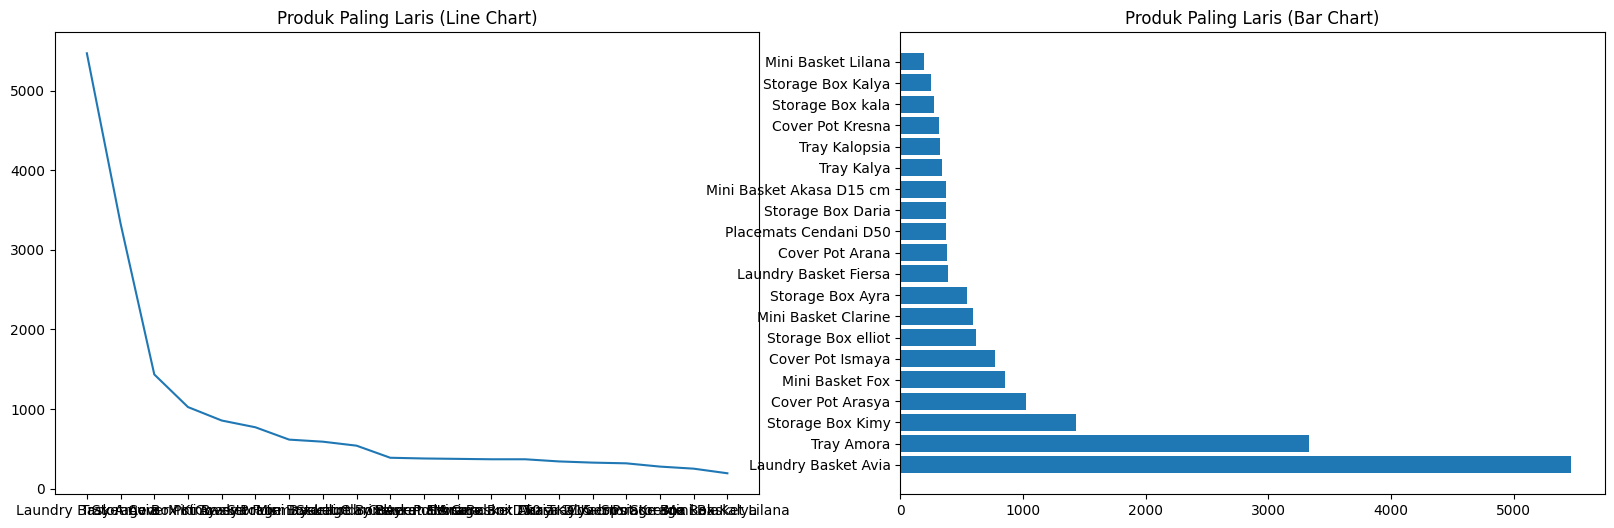

In [45]:
# Visualisasikan data penjualan item terbanyak ke line chart dan bar chart
# Menghitung 20 data penjualan item terbanyak
top_items = df['Item'].value_counts().head(20)

# Menampilkan visualisasi data dalam bentuk line chart
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(top_items)
plt.title('Produk Paling Laris (Line Chart)')

# Menampilkan visualisasi data dalam bentuk bar chart
plt.subplot(1,2,2)
plt.barh(top_items.index, top_items.values)
plt.title('Produk Paling Laris (Bar Chart)')

plt.show()

Berdasarkan hasil visualisasi, sebutkan 3 barang yang paling banyak terjual !
=>


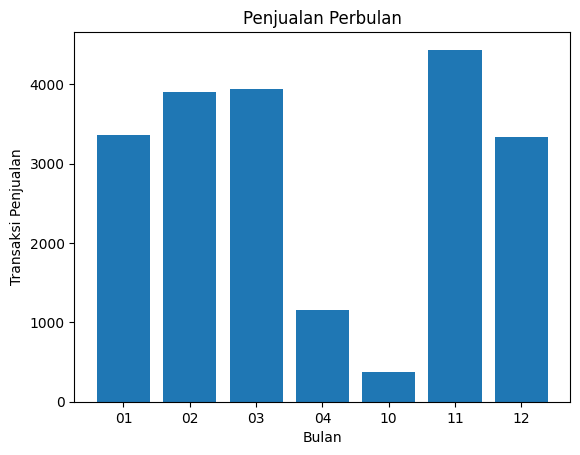

In [39]:
#buat visualisasi data diagram batang dengan judul 'Monthly Sales' dengan sumbu x bulan dan sumbu y jumlah transaksi
monthly_sales = df['Month'].value_counts().sort_index()

plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Bulan')
plt.ylabel('Transaksi Penjualan')
plt.title('Penjualan Perbulan')

plt.show()

Dari hasil visualisasi data penjualan perbulan, terlihat terjadi perbedaan penjualan yang drastis pada bulan 4 dan 10 ini disebut dengan outlier.
Untuk mengetahui lebih lanjut, kita bisa periksa untuk melihat apakah ada lebih sedikit transaksi harian yang dicatat untuk bulan-bulan ini dibandingkan dengan yang lain.

In [40]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


Pada Bulan 4 hanya tercatat 9 hari dan pada bulan  10 hanya tercatat 2 hari

## **5. Implementasi Algoritma Apriori**

Pertama kita mengubah item list menjadi data transaksi dengan menggunakan TransactionEncoder.
Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.
library mlxtend

In [41]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang benar

In [42]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
#for i in df['Transaction'].unique():
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [43]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

Sekarang kita terapkan Apriori. Kita akan menggunakan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Kita akan mengurutkan nilai berdasarkan keyakinan untuk melihat kemungkinan suatu barang dibeli jika pendahulunya dibeli.

In [44]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift" , min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
35,"(Storage Box Kimy, Laundry Basket Avia)",(Cover Pot Arasya),0.010037,0.201271,1.937977
36,(Cover Pot Arasya),"(Storage Box Kimy, Laundry Basket Avia)",0.010037,0.096643,1.937977
4,(Cover Pot Arasya),(Mini Basket Clarine),0.011410,0.109868,1.883874
5,(Mini Basket Clarine),(Cover Pot Arasya),0.011410,0.195652,1.883874
6,(Storage Box Kimy),(Cover Pot Arasya),0.023772,0.166667,1.604781
7,(Cover Pot Arasya),(Storage Box Kimy),0.023772,0.228891,1.604781
13,(Laundry Basket Avia),(Cover Pot Kresna),0.023666,0.049470,1.472431
12,(Cover Pot Kresna),(Laundry Basket Avia),0.023666,0.704403,1.472431
41,(Mini Basket Fox),"(Tray Amora, Laundry Basket Avia)",0.011199,0.130061,1.434768
40,"(Tray Amora, Laundry Basket Avia)",(Mini Basket Fox),0.011199,0.123543,1.434768


# **Kesimpulan**

Penjelasan nilai-nilai metrik (support, confidence, dan lift)!

**Berdasarkan analisis dengan nilai min_support sebesar 0.01, adapun hasil beberapa aturan asosiasi yang menunjukkan item yang sering dibeli bersamaan antara lain:**
1. Storage Box Kimy dan Laundry Basket Avia	
2. Tray Amora dan Laundry Basket Avia
3. Cover Pot Arasya dan Laundry Basket Avia	


**Kesimpulannya secara garis besar:**

Aturan-aturan ini menunjukkan bahwa kombinasi produk-produk tersebut memiliki tingkat kejadian yang tinggi, dan pelanggan cenderung membeli item tersebut bersamaan. Ini dapat memberikan wawasan berharga untuk strategi pemasaran, penempatan produk pada etalase web, atau penawaran bundel yang dapat meningkatkan penjualan dan kepuasan pelanggan. Karena Algoritma Apriori membantu mengidentifikasi aturan asosiasi yang dapat memberikan wawasan tentang kecenderungan pelanggan membeli produk bersamaan.